 #  A Whale off the Port(folio)

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500.

In [3]:
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:
1. whale_returns.csv
2. algo_returns.csv
3. sp500_history.csv

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [4]:
# Reading whale returns
whale_returns_csv = Path("Resources/whale_returns.csv")
whale_returns = pd.read_csv(whale_returns_csv)
whale_returns.set_index(pd.to_datetime(whale_returns['Date'], infer_datetime_format=True), inplace=True)
whale_returns.drop(columns="Date", inplace=True)
whale_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [5]:
# Count nulls
whale_returns.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [6]:
# Drop nulls
whale_returns = whale_returns.dropna().copy()
whale_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652


## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [7]:
# Reading algorithmic returns
algo_returns_csv = Path("Resources/algo_returns.csv")
algo_returns = pd.read_csv(algo_returns_csv)
algo_returns.set_index(pd.to_datetime(algo_returns['Date'], infer_datetime_format=True), inplace=True)
algo_returns.drop(columns="Date", inplace=True)
algo_returns.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [8]:
# Count nulls
algo_returns.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [9]:
# Drop nulls
algo_returns = algo_returns.dropna().copy()
algo_returns.head()

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761


## S&P 500 Returns

Read the S&P500 Historic Closing Prices and create a new daily returns DataFrame from the data. 

In [97]:
# Reading S&P 500 Closing Prices
sp500_history_csv = Path("Resources/sp500_history.csv")
sp500_history = pd.read_csv(sp500_history_csv)
sp500_history.set_index(pd.to_datetime(sp500_history['Date'], infer_datetime_format=True), inplace=True)
sp500_history.drop(columns="Date", inplace=True)
sp500_history.head()

,Close
Date,
2019-04-23,$2933.68
2019-04-22,$2907.97
2019-04-18,$2905.03
2019-04-17,$2900.45
2019-04-16,$2907.06


In [98]:
# Check Data Types
sp500_history.dtypes

Close    object
dtype: object

In [99]:
# Fix Data Types
sp500_history["Close"] = sp500_history["Close"].str.replace("$", "")
sp500_history["Close"] = sp500_history["Close"].astype("float")
sp500_history.head()

,Close
Date,
2019-04-23,2933.68
2019-04-22,2907.97
2019-04-18,2905.03
2019-04-17,2900.45
2019-04-16,2907.06


In [100]:
# Calculate Daily Returns
sp500_daily_returns = sp500_history.pct_change()
sp500_daily_returns.head()


,Close
Date,
2019-04-23,NaN
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279


In [101]:
# Drop nulls
sp500_daily_returns = sp500_daily_returns.dropna().copy()
sp500_daily_returns.isnull().sum()

Close    0
dtype: int64

In [102]:
# Rename Column
sp500_daily_returns.columns = ["S&P 500"]
sp500_daily_returns

,S&P 500
Date,
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279
2019-04-15,-0.000509
...,...
2012-10-05,0.003469
2012-10-04,0.000322
2012-10-03,-0.007123


## Combine Whale, Algorithmic, and S&P 500 Returns

In [103]:
# Concatenate all DataFrames into a single DataFrame
combined_daily_returns_df = pd.concat([whale_returns,algo_returns,sp500_daily_returns], axis='columns', join='inner')
combined_daily_returns_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,0.004408
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.001195
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.014378
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.003929
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.017254


# Portfolio Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance

Calculate and Plot the daily returns and cumulative returns. Does any portfolio outperform the S&P 500? 

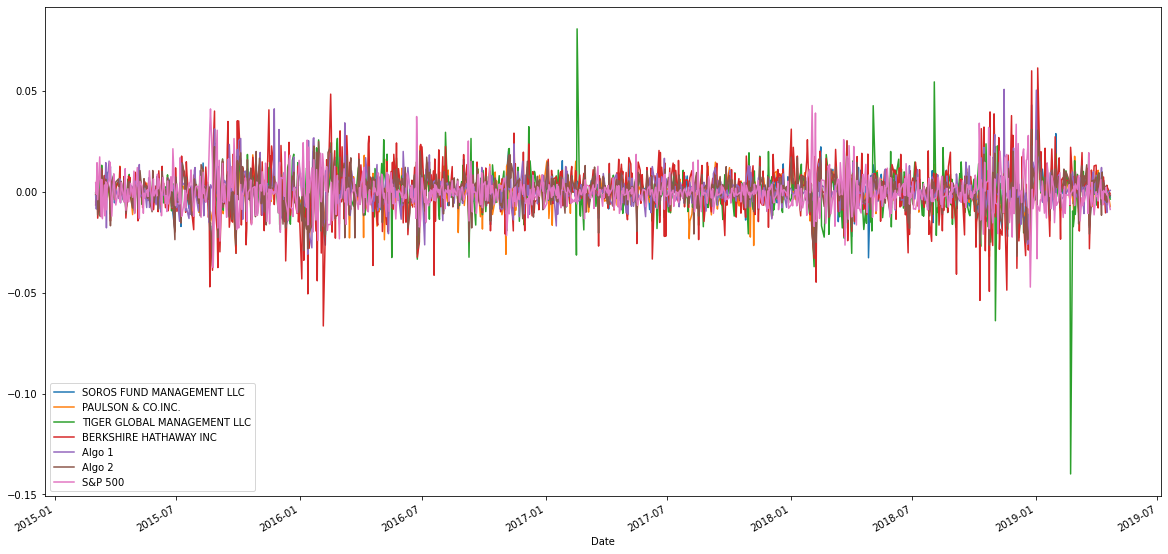

In [63]:
# Plot daily returns
combined_daily_returns_df.plot(figsize=(20,10))


SOROS FUND MANAGEMENT LLC       True
PAULSON & CO.INC.               True
TIGER GLOBAL MANAGEMENT LLC     True
BERKSHIRE HATHAWAY INC          True
Algo 1                          True
Algo 2                          True
S&P 500                        False
Name: 2019-04-22 00:00:00, dtype: bool

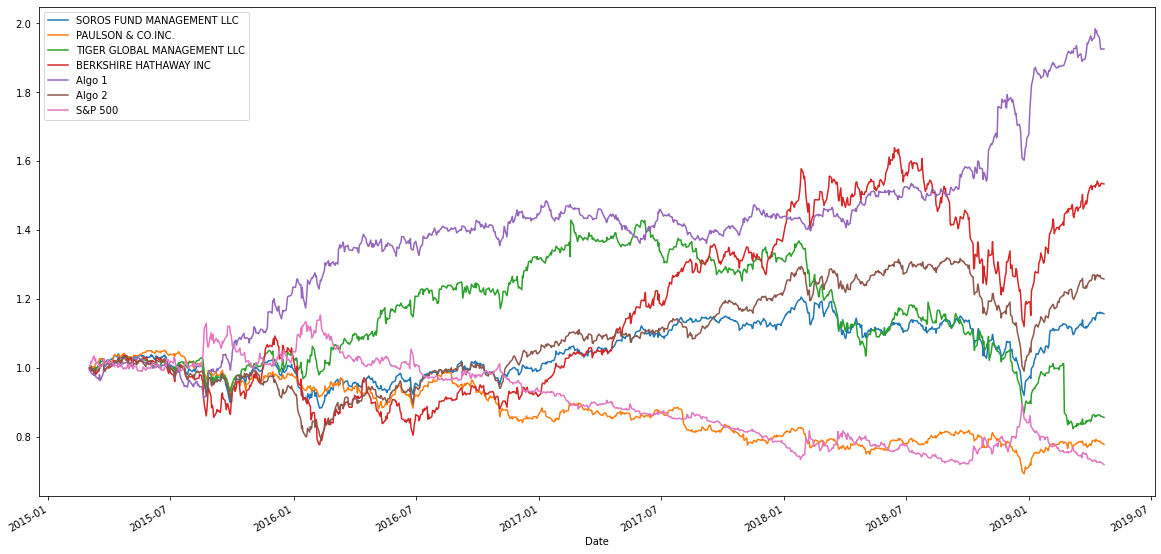

In [64]:
# Plot cumulative returns

cumulative_returns = (1 + combined_daily_returns_df).cumprod()
cumulative_returns.plot(figsize=(20,10))
combined_daily_returns_df.iloc[-1] > combined_daily_returns_df["S&P 500"][-1]

## Risk

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

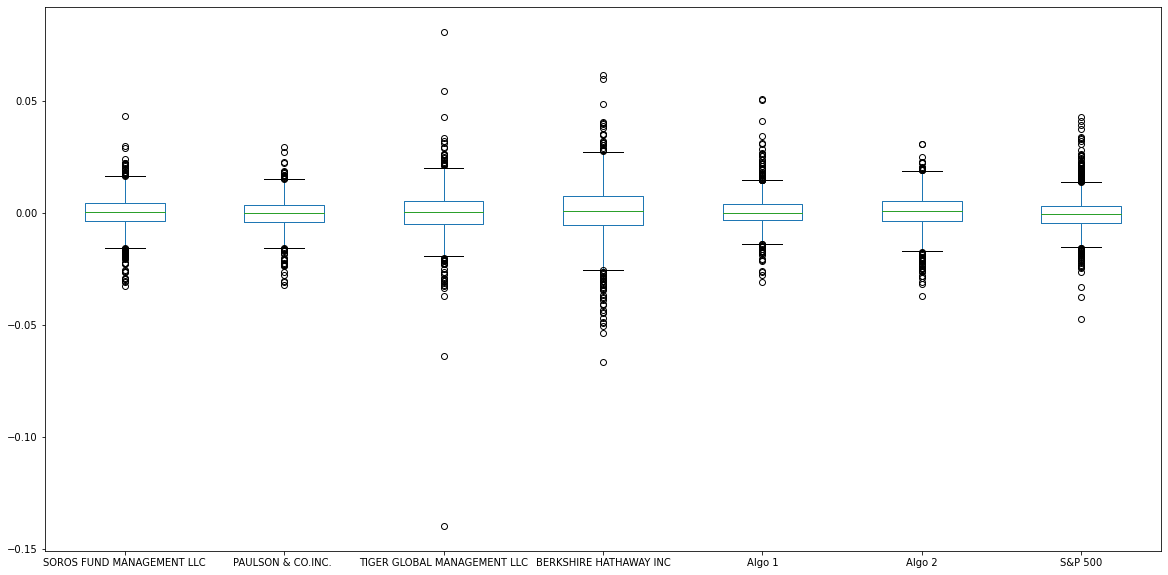

In [65]:
# Box plot to visually show risk
combined_daily_returns_df.plot(kind='box',figsize=(20,10))

In [66]:
# Daily Standard Deviations
daily_std = combined_daily_returns_df.std() 
daily_std
# Which portfolios are riskier than the S&P 500?

SOROS FUND MANAGEMENT LLC      0.007896
PAULSON & CO.INC.              0.007026
TIGER GLOBAL MANAGEMENT LLC    0.010897
BERKSHIRE HATHAWAY INC         0.012919
Algo 1                         0.007623
Algo 2                         0.008341
S&P 500                        0.008587
dtype: float64

In [67]:
# Determine which portfolios are riskier than the S&P 500
daily_std > daily_std['S&P 500']

SOROS FUND MANAGEMENT LLC      False
PAULSON & CO.INC.              False
TIGER GLOBAL MANAGEMENT LLC     True
BERKSHIRE HATHAWAY INC          True
Algo 1                         False
Algo 2                         False
S&P 500                        False
dtype: bool

In [68]:
# Calculate the annualized standard deviation (252 trading days)
annualized_std = daily_std * np.sqrt(252)
annualized_std

SOROS FUND MANAGEMENT LLC      0.125348
PAULSON & CO.INC.              0.111527
TIGER GLOBAL MANAGEMENT LLC    0.172989
BERKSHIRE HATHAWAY INC         0.205079
Algo 1                         0.121006
Algo 2                         0.132413
S&P 500                        0.136313
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Plot the rolling standard deviation of the various portfolios along with the rolling standard deviation of the S&P 500 (consider a 21 day window). Does the risk increase for each of the portfolios at the same time risk increases in the S&P?
2. Construct a correlation table for the algorithmic, whale, and S&P 500 returns. Which returns most closely mimic the S&P?
3. Choose one portfolio and plot a rolling beta between that portfolio's returns and S&P 500 returns. Does the portfolio seem sensitive to movements in the S&P 500?
4. An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the ewm with a 21 day half-life.

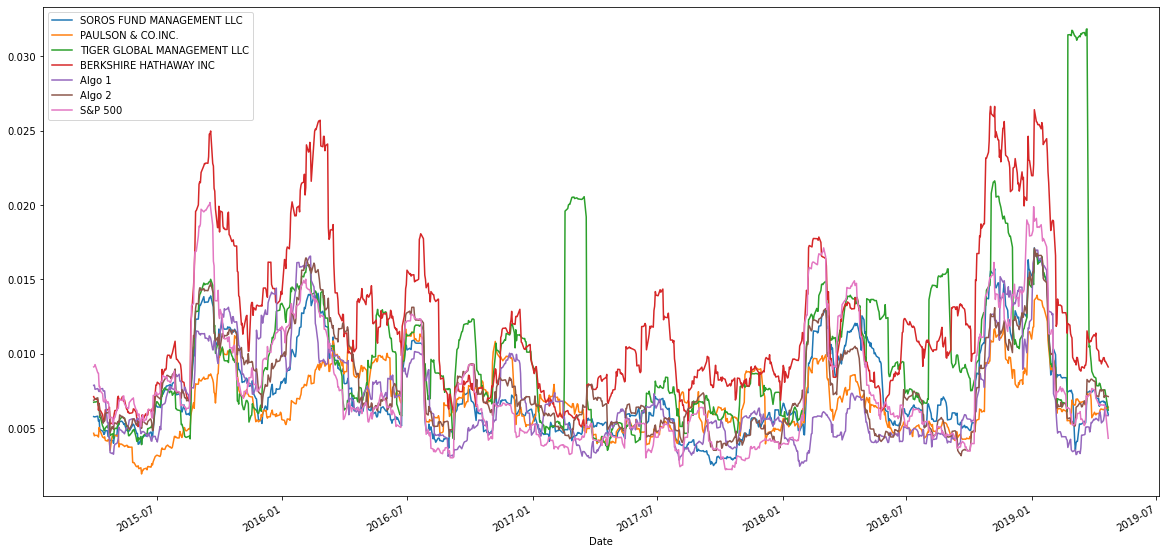

In [69]:
# Calculate and plot the rolling standard deviation for
# the S&P 500 and whale portfolios using a 21 trading day window
combined_daily_returns_df.rolling(window=21).std().plot(figsize=(20,10))


In [70]:
# Construct a correlation table
correlation_table = combined_daily_returns_df.corr()
correlation_table

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
SOROS FUND MANAGEMENT LLC,1.000000,0.699823,0.561040,0.754157,0.320901,0.826730,0.000574
PAULSON & CO.INC.,0.699823,1.000000,0.434308,0.545451,0.268631,0.678085,0.013549
TIGER GLOBAL MANAGEMENT LLC,0.561040,0.434308,1.000000,0.424125,0.164114,0.507160,-0.001505
BERKSHIRE HATHAWAY INC,0.754157,0.545451,0.424125,1.000000,0.291678,0.687756,-0.013856
Algo 1,0.320901,0.268631,0.164114,0.291678,1.000000,0.287852,-0.033963
Algo 2,0.826730,0.678085,0.507160,0.687756,0.287852,1.000000,-0.002192
S&P 500,0.000574,0.013549,-0.001505,-0.013856,-0.033963,-0.002192,1.000000


In [71]:
SP500_Correlation = correlation_table["S&P 500"].sort_values(ascending=False)
SP500_Correlation

S&P 500                        1.000000
PAULSON & CO.INC.              0.013549
SOROS FUND MANAGEMENT LLC      0.000574
TIGER GLOBAL MANAGEMENT LLC   -0.001505
Algo 2                        -0.002192
BERKSHIRE HATHAWAY INC        -0.013856
Algo 1                        -0.033963
Name: S&P 500, dtype: float64

In [72]:
Absolute_Strength_SP500_Correlation = abs(correlation_table["S&P 500"]).sort_values(ascending=False)
Absolute_Strength_SP500_Correlation

S&P 500                        1.000000
Algo 1                         0.033963
BERKSHIRE HATHAWAY INC         0.013856
PAULSON & CO.INC.              0.013549
Algo 2                         0.002192
TIGER GLOBAL MANAGEMENT LLC    0.001505
SOROS FUND MANAGEMENT LLC      0.000574
Name: S&P 500, dtype: float64

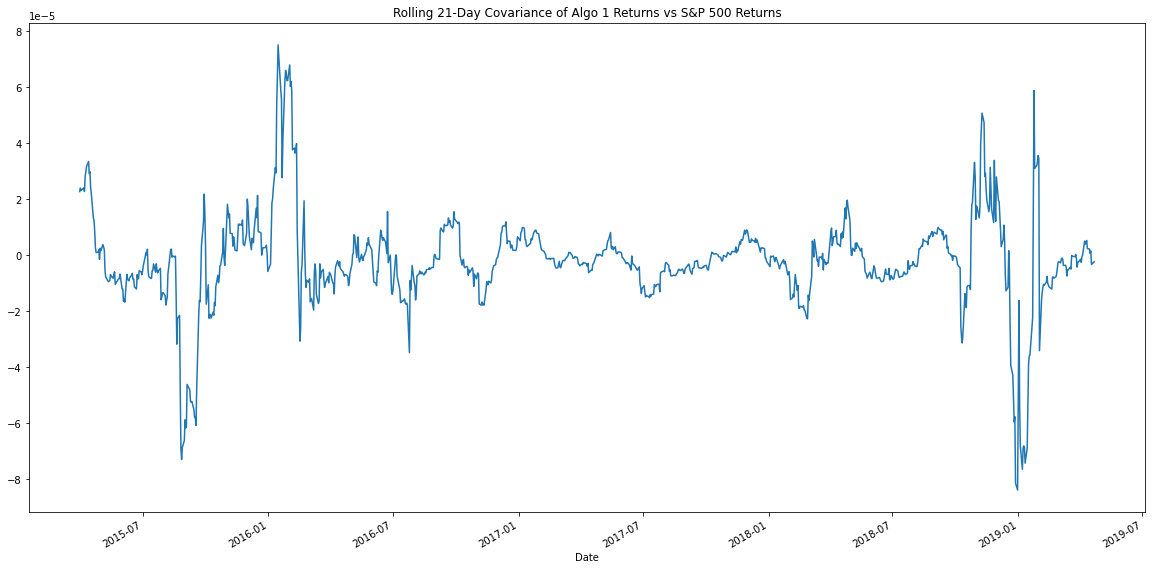

In [73]:
# Calculate Beta for a single portfolio compared to the total market (S&P 500)
# (Your graph may differ, dependent upon which portfolio you are comparing)
Algo_1_Rolling_Cov = combined_daily_returns_df['Algo 1'].rolling(window=21).cov(combined_daily_returns_df['S&P 500'])
Algo_1_Rolling_Cov.plot(figsize=(20, 10), title='Rolling 21-Day Covariance of Algo 1 Returns vs S&P 500 Returns')

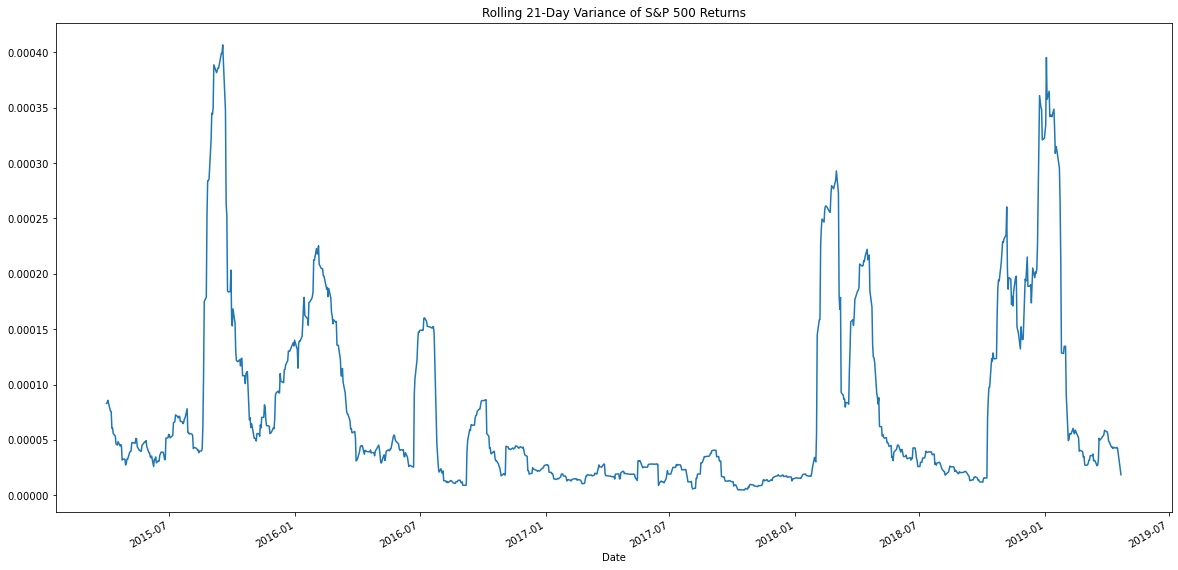

In [74]:
SP500_Rolling_Var = combined_daily_returns_df['S&P 500'].rolling(window=21).var()
SP500_Rolling_Var.plot(figsize=(20, 10), title='Rolling 21-Day Variance of S&P 500 Returns')

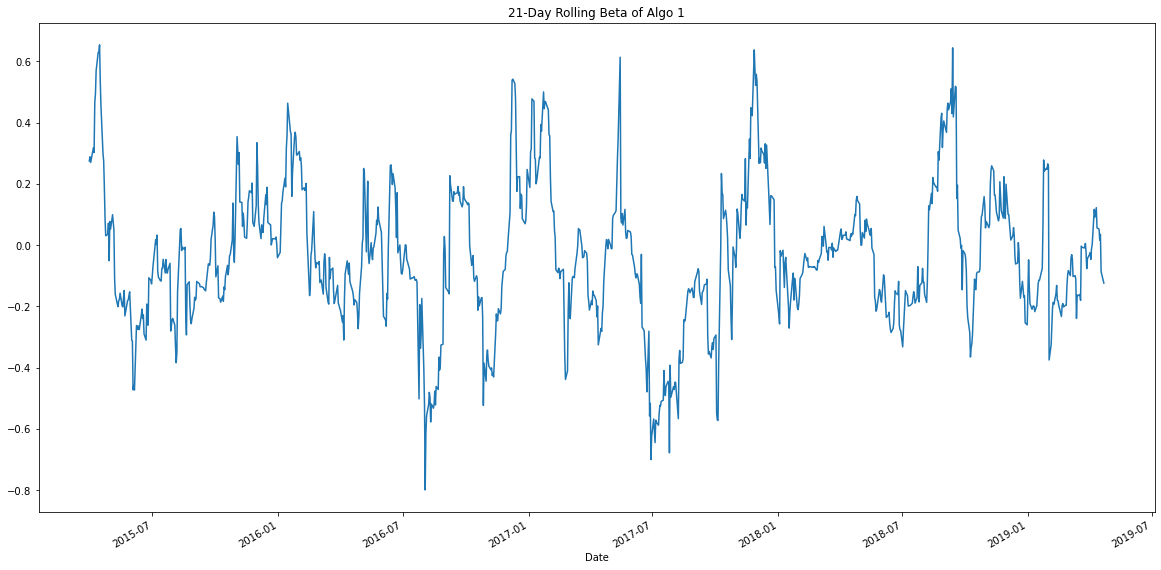

In [75]:
Algo_1_Rolling_Beta = (Algo_1_Rolling_Cov) / (SP500_Rolling_Var)
Algo_1_Rolling_Beta.plot(figsize=(20,10), title="21-Day Rolling Beta of Algo 1")

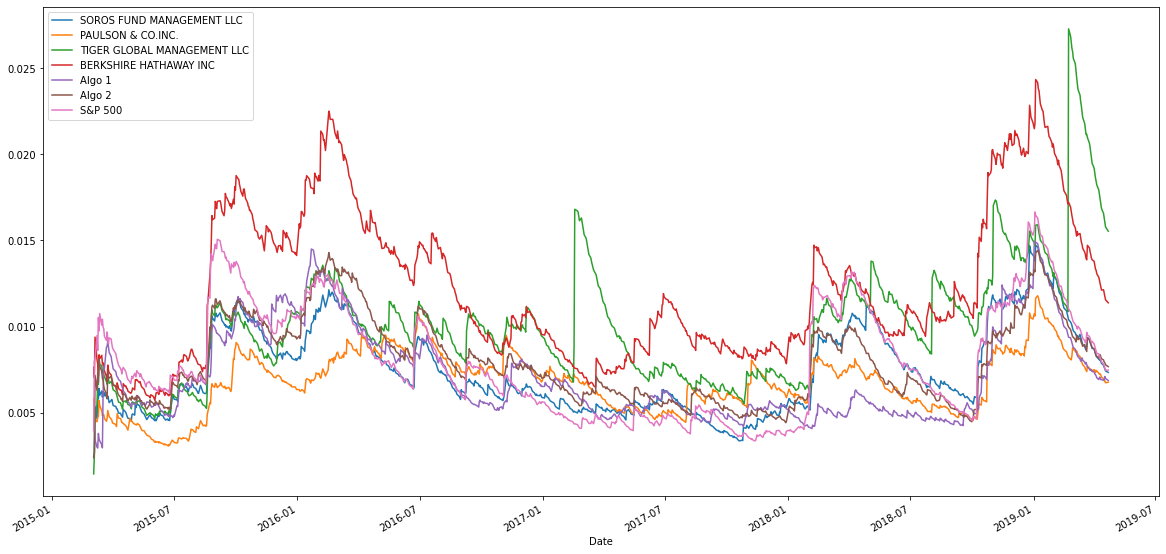

In [76]:
# Calculate a rolling window using the exponentially weighted moving average. 
EMA = combined_daily_returns_df.ewm(halflife=21).std().plot(figsize=(20,10))


---

## Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. (After all, if you could invest in one of two portfolios, each offered the same 10% return, yet one offered lower risk, you'd take that one, right?)

1. Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot.
2. Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

In [77]:
# Calculate annualized Sharpe Ratios
sharpe_ratios = (combined_daily_returns_df.mean() * 252) / (daily_std * np.sqrt(252))
sharpe_ratios.sort_values()

S&P 500                       -0.518582
PAULSON & CO.INC.             -0.491422
TIGER GLOBAL MANAGEMENT LLC   -0.130186
SOROS FUND MANAGEMENT LLC      0.342894
Algo 2                         0.484334
BERKSHIRE HATHAWAY INC         0.606743
Algo 1                         1.369589
dtype: float64

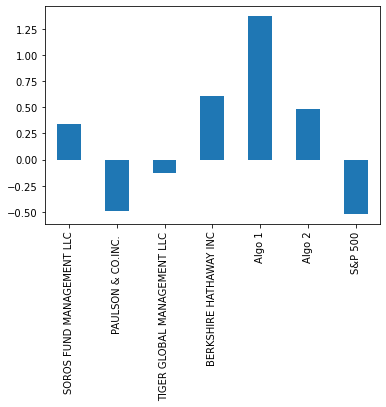

In [78]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind="bar")

On the basis of this performance metric, do our algo strategies outperform both 'the market' and the whales? Type your answer here: 
With the exception of Berkshire Hathaway, both of the algos signification outperformed all of the whales and the larger market, and Algo 1 vastly outperformed all other portfolios.

# Portfolio Returns

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Visit [Google Sheets](https://docs.google.com/spreadsheets/) and use the in-built Google Finance function to choose 3-5 stocks for your own portfolio.
2. Download the data as CSV files and calculate the portfolio returns.
3. Calculate the returns for each stock.
4. Using those returns, calculate the weighted returns for your entire portfolio assuming an equal number of shares for each stock.
5. Add your portfolio returns to the DataFrame with the other portfolios and rerun the analysis. How does your portfolio fair?


## Your analysis should include the following:

- Using all portfolios:
 - The annualized standard deviation (252 trading days) for all portfolios.
 - The plotted rolling standard deviation using a 21 trading day window for all portfolios.
 - The calculated annualized Sharpe Ratios and the accompanying bar plot visualization.
 - A correlation table.
- Using your custom portfolio and one other of your choosing:
 - The plotted beta. 

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [177]:
# Read the first stock
GOOG_csv = Path("Resources/GOOG_Data.csv")
GOOG_returns = pd.read_csv(GOOG_csv)
GOOG_returns.columns = ["Trade DATE","NOPC"]
GOOG_returns["Symbol"] = "GOOG"
GOOG_returns.head()

,Trade DATE,NOPC,Symbol
0,10/1/2019 16:00:00,1205.10,GOOG
1,10/2/2019 16:00:00,1176.63,GOOG
2,10/3/2019 16:00:00,1187.83,GOOG
3,10/4/2019 16:00:00,1209.00,GOOG
4,10/7/2019 16:00:00,1207.68,GOOG


In [178]:
# Read the second stock
AAPL_csv = Path("Resources/AAPL_Data.csv")
AAPL_returns = pd.read_csv(AAPL_csv)
AAPL_returns.columns = ["Trade DATE","NOPC"]
AAPL_returns["Symbol"] = "AAPL"
AAPL_returns.head()

,Trade DATE,NOPC,Symbol
0,10/1/2019 16:00:00,56.15,AAPL
1,10/2/2019 16:00:00,54.74,AAPL
2,10/3/2019 16:00:00,55.21,AAPL
3,10/4/2019 16:00:00,56.75,AAPL
4,10/7/2019 16:00:00,56.77,AAPL


In [179]:
# Read the third stock
TSLA_csv = Path("Resources/TSLA_Data.csv")
TSLA_returns = pd.read_csv(TSLA_csv)
TSLA_returns.columns = ["Trade DATE","NOPC"]
#TSLA_returns.set_index(pd.to_datetime(TSLA_returns['Trade DATE'], infer_datetime_format=True), inplace=True)
TSLA_returns["Symbol"] = "TSLA"
TSLA_returns.head()

,Trade DATE,NOPC,Symbol
0,10/1/2019 16:00:00,48.94,TSLA
1,10/2/2019 16:00:00,48.63,TSLA
2,10/3/2019 16:00:00,46.61,TSLA
3,10/4/2019 16:00:00,46.29,TSLA
4,10/7/2019 16:00:00,47.54,TSLA


In [180]:
# Concatenate all stocks into a single DataFrame
my_portfolio_df = GOOG_returns.append([AAPL_returns,TSLA_returns])
my_portfolio_df = my_portfolio_df.set_index("Trade DATE")
my_portfolio_df

,NOPC,Symbol
Trade DATE,,
10/1/2019 16:00:00,1205.10,GOOG
10/2/2019 16:00:00,1176.63,GOOG
10/3/2019 16:00:00,1187.83,GOOG
10/4/2019 16:00:00,1209.00,GOOG
10/7/2019 16:00:00,1207.68,GOOG
...,...,...
9/24/2020 16:00:00,387.79,TSLA
9/25/2020 16:00:00,407.34,TSLA
9/28/2020 16:00:00,421.20,TSLA


In [181]:
# Reset the index
my_portfolio_df.reset_index(inplace=True)
my_portfolio_df

,Trade DATE,NOPC,Symbol
0,10/1/2019 16:00:00,1205.10,GOOG
1,10/2/2019 16:00:00,1176.63,GOOG
2,10/3/2019 16:00:00,1187.83,GOOG
3,10/4/2019 16:00:00,1209.00,GOOG
4,10/7/2019 16:00:00,1207.68,GOOG
...,...,...,...
754,9/24/2020 16:00:00,387.79,TSLA
755,9/25/2020 16:00:00,407.34,TSLA
756,9/28/2020 16:00:00,421.20,TSLA
757,9/29/2020 16:00:00,419.07,TSLA


In [182]:
# Pivot so that each column of prices represents a unique symbol
my_portfolio_df = my_portfolio_df.pivot(index="Trade DATE", columns="Symbol", values="NOPC")

In [187]:
# Drop Nulls
my_portfolio_df = my_portfolio_df.pct_change()
my_portfolio_df.head()

Symbol,AAPL,GOOG,TSLA
Trade DATE,,,
1/16/2020 16:00:00,NaN,NaN,NaN
1/17/2020 16:00:00,-0.867988,-0.881085,-0.739004
1/2/2020 16:00:00,42.232803,0.779492,-421.651347
1/21/2020 16:00:00,-0.980522,-0.781456,-1.006856
1/22/2020 16:00:00,-0.756552,-0.940647,-0.616663


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [188]:
# Calculate weighted portfolio returns
weights = [1/3, 1/3, 1/3]
portfolio_returns = my_portfolio_df.dot(weights)
portfolio_returns.head()

Trade DATE
1/16/2020 16:00:00           NaN
1/17/2020 16:00:00     -0.829359
1/2/2020 16:00:00    -126.213017
1/21/2020 16:00:00     -0.922945
1/22/2020 16:00:00     -0.771287
dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [88]:
# Add your "Custom" portfolio to the larger dataframe of fund returns
# YOUR CODE HERE

In [89]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
# YOUR CODE HERE

## Re-run the performance and risk analysis with your portfolio to see how it compares to the others

In [686]:
# Risk
# YOUR CODE HERE

In [687]:
# Rolling
# YOUR CODE HERE

In [688]:
# Annualized Sharpe Ratios
# YOUR CODE HERE

In [689]:
# Visualize the sharpe ratios as a bar plot
# YOUR CODE HERE

In [690]:
# Create a correlation analysis
# YOUR CODE HERE

In [691]:
# Beta
# YOUR CODE HERE